In [1]:
## import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [74]:
## load our dataset
df = pd.read_csv("all_month.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.1713,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak


In [4]:
## know your structure of your datdset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9410 non-null   object 
 1   latitude         9410 non-null   float64
 2   longitude        9410 non-null   float64
 3   depth            9410 non-null   float64
 4   mag              9409 non-null   float64
 5   magType          9409 non-null   object 
 6   nst              6823 non-null   float64
 7   gap              6822 non-null   float64
 8   dmin             5053 non-null   float64
 9   rms              9410 non-null   float64
 10  net              9410 non-null   object 
 11  id               9410 non-null   object 
 12  updated          9410 non-null   object 
 13  place            9410 non-null   object 
 14  type             9410 non-null   object 
 15  horizontalError  6347 non-null   float64
 16  depthError       9410 non-null   float64
 17  magError      

In [5]:
## checking the dataset for missing values
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2587
gap                2588
dmin               4357
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError            0
magError           2665
magNst             2600
status                0
locationSource        0
magSource             0
dtype: int64

In [6]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9410.000000,9410.000000,9410.000000,9409.000000,6823.000000,6822.000000,5053.000000,9410.000000,6347.000000,9410.000000,6745.000000,6810.000000
mean,40.694347,-117.863831,25.593011,1.645013,23.403635,119.461838,0.747333,0.294069,1.698991,2.083547,0.276723,15.534655
std,20.430642,66.380624,54.697555,1.230108,22.145048,62.376305,2.697378,0.276421,3.095408,15.786392,0.477658,23.290696
min,-65.407100,-179.973800,-3.330000,-1.120000,0.000000,14.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.431417,-154.926417,2.972500,0.890000,9.000000,70.000000,0.014850,0.090000,0.260000,0.420000,0.110000,5.000000
50%,38.830166,-122.852837,9.125811,1.430000,17.000000,106.000000,0.063090,0.176600,0.440000,0.710000,0.169000,9.000000
75%,58.247167,-116.722042,25.296000,2.100000,31.000000,157.000000,0.196200,0.470000,0.860000,1.400000,0.248000,18.000000
max,82.000600,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,768.000000


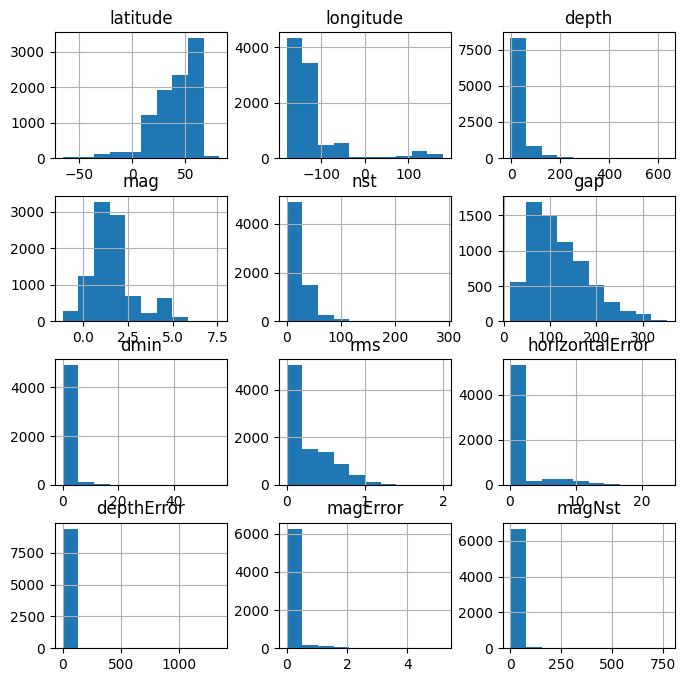

In [95]:
## plot an histogram
df.hist(bins = 10, figsize = (8,8))
plt.show()

In [12]:
## Check the frequency of all the earthquakes:
freq = df['mag'].value_counts()
freq


 1.40    279
 1.60    277
 1.50    266
 1.70    227
 1.30    207
        ... 
 3.72      1
 3.67      1
-0.85      1
 3.75      1
 2.78      1
Name: mag, Length: 577, dtype: int64

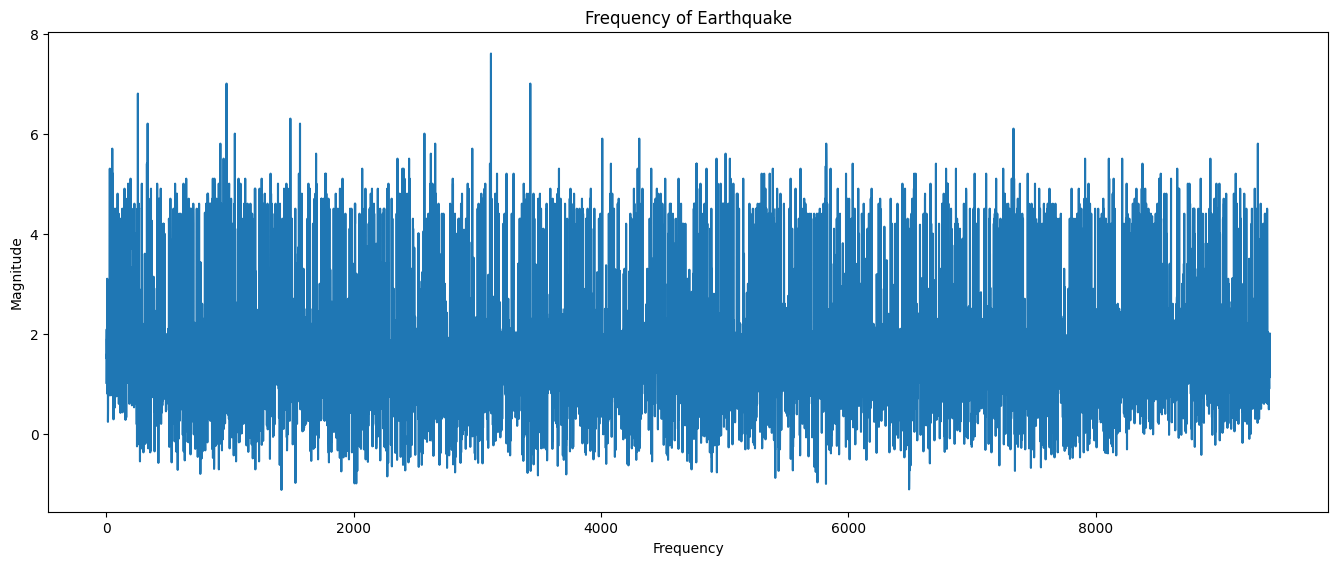

In [24]:
## plot frequency
fig1 = plt.figure()
Mg = fig1.add_axes([0.1, 0.1, 2, 1])
Mg.plot(df['mag'])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title("Frequency of Earthquake")
plt.show()

In [104]:
## Identify Earthquake per it's magnitude.

df.loc[df.mag > 4 , 'mag'] = 1
df.loc[df.mag < 4 , 'mag'] = 0
df


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,0.0,ml,15.0,101.00,0.171300,0.1500,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,0.0,md,32.0,33.00,NaN,0.0200,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,0.0,ml,NaN,NaN,NaN,0.5000,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,0.0,md,31.0,117.00,NaN,0.1900,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,0.0,ml,NaN,NaN,NaN,0.1300,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9405,2022-12-23T02:44:45.937Z,63.282800,-150.606500,127.70,0.0,ml,NaN,NaN,NaN,0.3900,...,2023-01-07T03:06:05.369Z,"62 km ESE of Denali National Park, Alaska",earthquake,NaN,0.50,NaN,NaN,reviewed,ak,ak
9406,2022-12-23T02:42:28.843Z,38.180500,-117.813900,7.90,0.0,ml,16.0,133.87,0.122000,0.1421,...,2022-12-23T17:26:10.304Z,"34 km SE of Mina, Nevada",earthquake,NaN,1.60,0.300,4.0,reviewed,nn,nn
9407,2022-12-23T02:41:04.040Z,38.829666,-122.791664,1.50,0.0,md,24.0,45.00,0.008791,0.0300,...,2022-12-23T03:09:14.609Z,"6km W of Cobb, CA",earthquake,0.19,0.35,0.130,24.0,automatic,nc,nc
9408,2022-12-23T02:30:14.282Z,63.368900,-153.228800,7.10,0.0,ml,NaN,NaN,NaN,0.7400,...,2023-01-14T00:17:55.844Z,"70 km NE of Nikolai, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak


In [105]:
## Rename Earthquake to Great and Minor
df['mag'] = df['mag'].replace({1: 'Great', 0:'Minor'})
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,Minor,ml,15.0,101.00,0.171300,0.1500,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,Minor,md,32.0,33.00,NaN,0.0200,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,Minor,ml,NaN,NaN,NaN,0.5000,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,Minor,md,31.0,117.00,NaN,0.1900,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,Minor,ml,NaN,NaN,NaN,0.1300,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9405,2022-12-23T02:44:45.937Z,63.282800,-150.606500,127.70,Minor,ml,NaN,NaN,NaN,0.3900,...,2023-01-07T03:06:05.369Z,"62 km ESE of Denali National Park, Alaska",earthquake,NaN,0.50,NaN,NaN,reviewed,ak,ak
9406,2022-12-23T02:42:28.843Z,38.180500,-117.813900,7.90,Minor,ml,16.0,133.87,0.122000,0.1421,...,2022-12-23T17:26:10.304Z,"34 km SE of Mina, Nevada",earthquake,NaN,1.60,0.300,4.0,reviewed,nn,nn
9407,2022-12-23T02:41:04.040Z,38.829666,-122.791664,1.50,Minor,md,24.0,45.00,0.008791,0.0300,...,2022-12-23T03:09:14.609Z,"6km W of Cobb, CA",earthquake,0.19,0.35,0.130,24.0,automatic,nc,nc
9408,2022-12-23T02:30:14.282Z,63.368900,-153.228800,7.10,Minor,ml,NaN,NaN,NaN,0.7400,...,2023-01-14T00:17:55.844Z,"70 km NE of Nikolai, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak


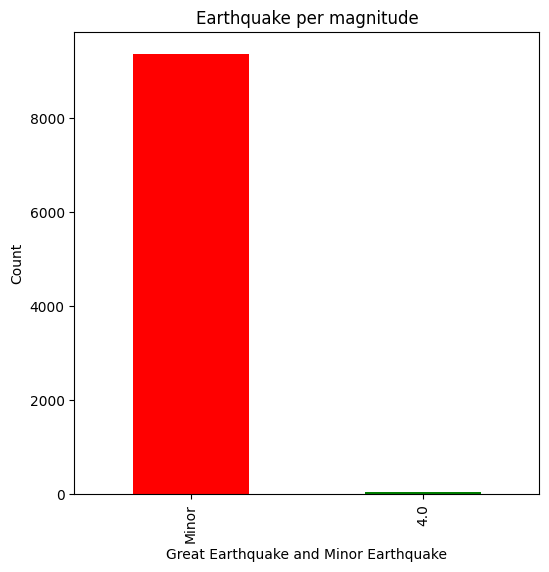

In [106]:
plt.figure(figsize=(6,6))
df['mag'].value_counts().plot(kind = "bar", color = ['red','green'])
plt.xlabel('Great Earthquake and Minor Earthquake')
plt.ylabel('Count')
plt.title("Earthquake per magnitude")
plt.show()

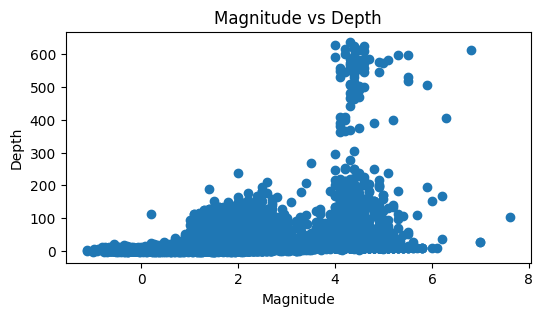

In [94]:
## plot Magnitude vs depth
plt.figure(figsize=(6, 3))
plt.scatter(
			x= df['mag'],
			y= df['depth'])
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title("Magnitude vs Depth")			
plt.show()


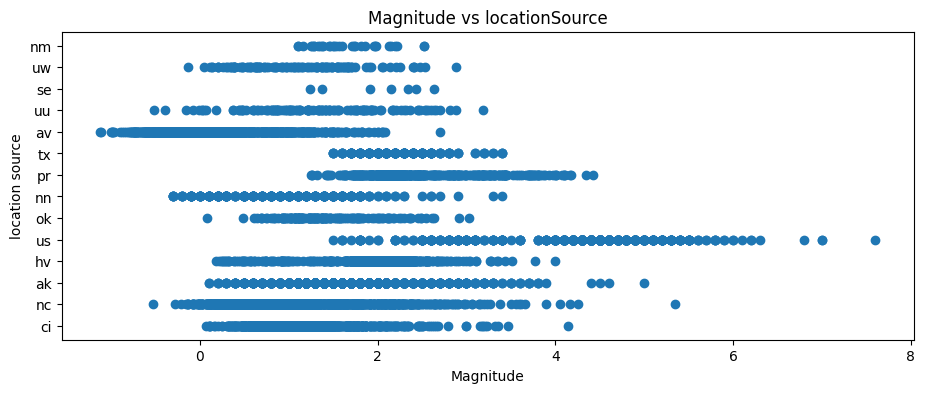

In [102]:
## plot Magnitude vs location source
plt.figure(figsize=(11, 4))
plt.scatter(
			x= df['mag'],
			y= df['locationSource'])
plt.xlabel('Magnitude')
plt.ylabel('location source')
plt.title("Magnitude vs locationSource")			
plt.show()